In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
csv_path = "C:/Users/HudayPlata/Documents/Unimag Tesis/Audio Tesis/IA Dataset audio/audio_metadata.csv"  # Cambia la ruta si es necesario

In [ ]:
df = pd.read_csv(csv_path)
df["Disparo"] = df["classID"] == 50

In [ ]:

conteo_clases = df["class"].value_counts().sort_values(ascending=False)
conteo_binario = df["Disparo"].value_counts().rename({True: "Disparo", False: "No Disparo"})

C:\Users\HudayPlata\AppData\Local\Temp\ipykernel_39048\3526538839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=conteo_clases.index, x=conteo_clases.values, palette="viridis")


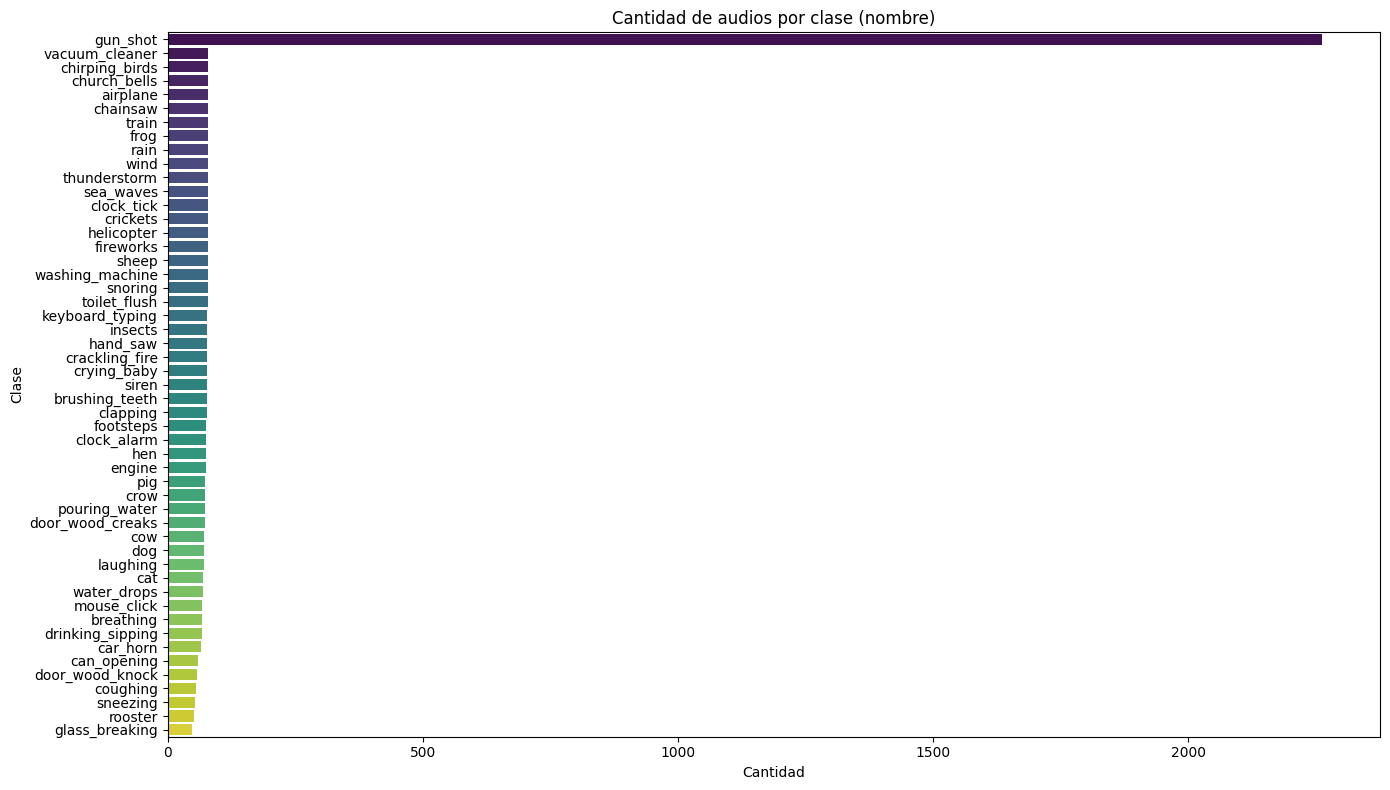

In [8]:
# --- Gráfico: Cantidad de audios por clase (nombres)
plt.figure(figsize=(14, 8))
sns.barplot(y=conteo_clases.index, x=conteo_clases.values, palette="viridis")
plt.title("Cantidad de audios por clase (nombre)")
plt.xlabel("Cantidad")
plt.ylabel("Clase")
plt.tight_layout()
plt.show()

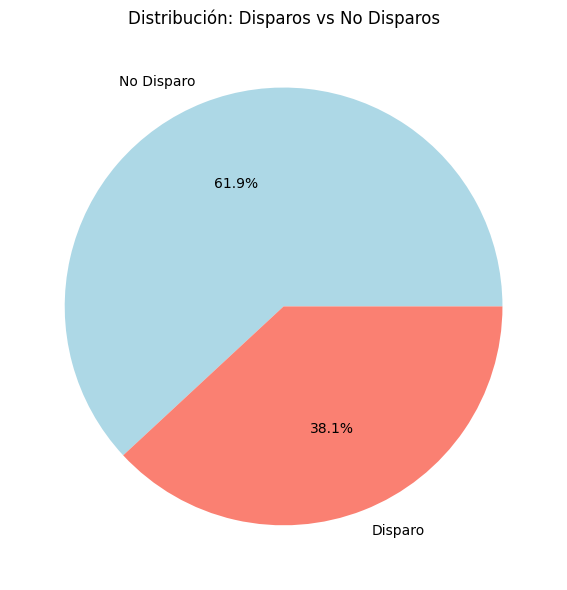

In [9]:
# --- Pie chart: Disparo vs No Disparo
plt.figure(figsize=(6, 6))
conteo_binario.plot.pie(autopct='%1.1f%%', colors=["lightblue", "salmon"])
plt.title("Distribución: Disparos vs No Disparos")
plt.ylabel("")
plt.tight_layout()
plt.show()

C:\Users\HudayPlata\AppData\Local\Temp\ipykernel_39048\742130900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_binario.index, y=conteo_binario.values, palette="Set2")


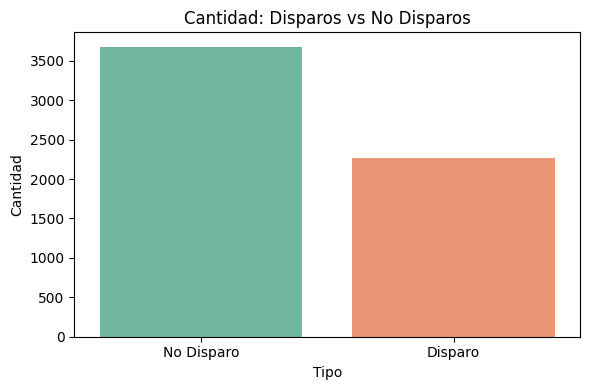

In [10]:
# --- Bar chart: Disparo vs No Disparo
plt.figure(figsize=(6, 4))
sns.barplot(x=conteo_binario.index, y=conteo_binario.values, palette="Set2")
plt.title("Cantidad: Disparos vs No Disparos")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

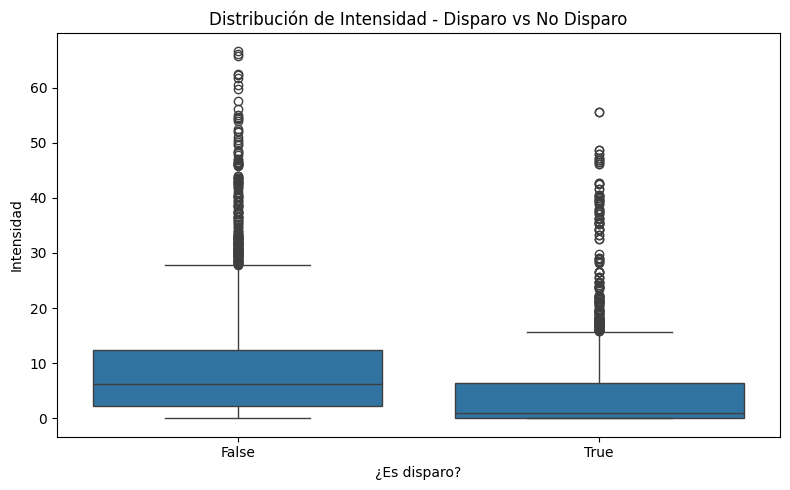

In [11]:
# --- Boxplot de Intensidad
plt.figure(figsize=(8, 5))
sns.boxplot(x="Disparo", y="Intensidad", data=df)
plt.title("Distribución de Intensidad - Disparo vs No Disparo")
plt.xlabel("¿Es disparo?")
plt.tight_layout()
plt.show()

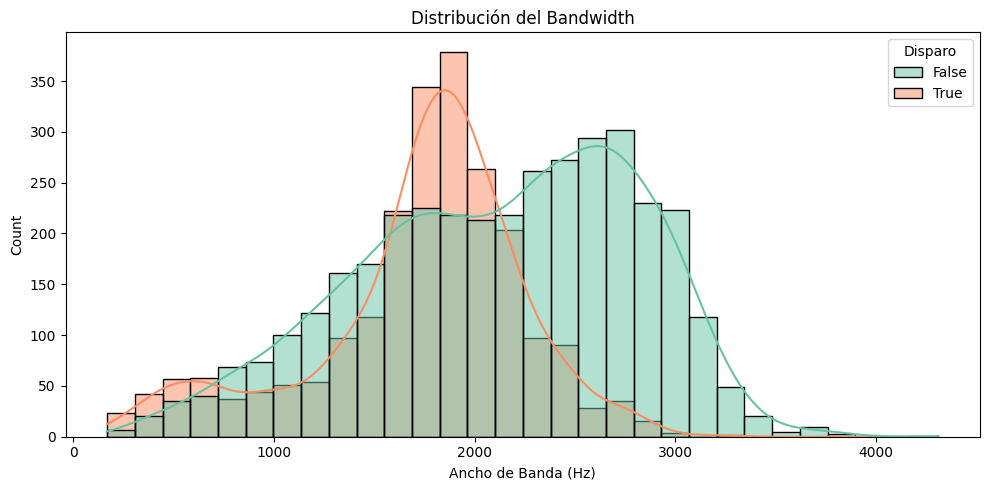

In [12]:
# --- Histograma Bandwidth
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="bandwiht", hue="Disparo", kde=True, bins=30, palette="Set2")
plt.title("Distribución del Bandwidth")
plt.xlabel("Ancho de Banda (Hz)")
plt.tight_layout()
plt.show()

C:\Users\HudayPlata\AppData\Local\Temp\ipykernel_39048\1584111898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Disparo", y="SNR", data=df, palette="pastel")


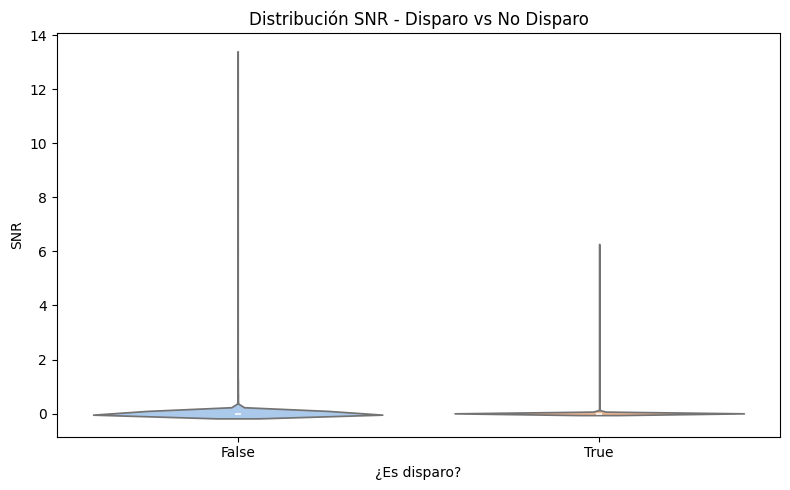

In [13]:
# --- Violinplot SNR
plt.figure(figsize=(8, 5))
sns.violinplot(x="Disparo", y="SNR", data=df, palette="pastel")
plt.title("Distribución SNR - Disparo vs No Disparo")
plt.xlabel("¿Es disparo?")
plt.tight_layout()
plt.show()

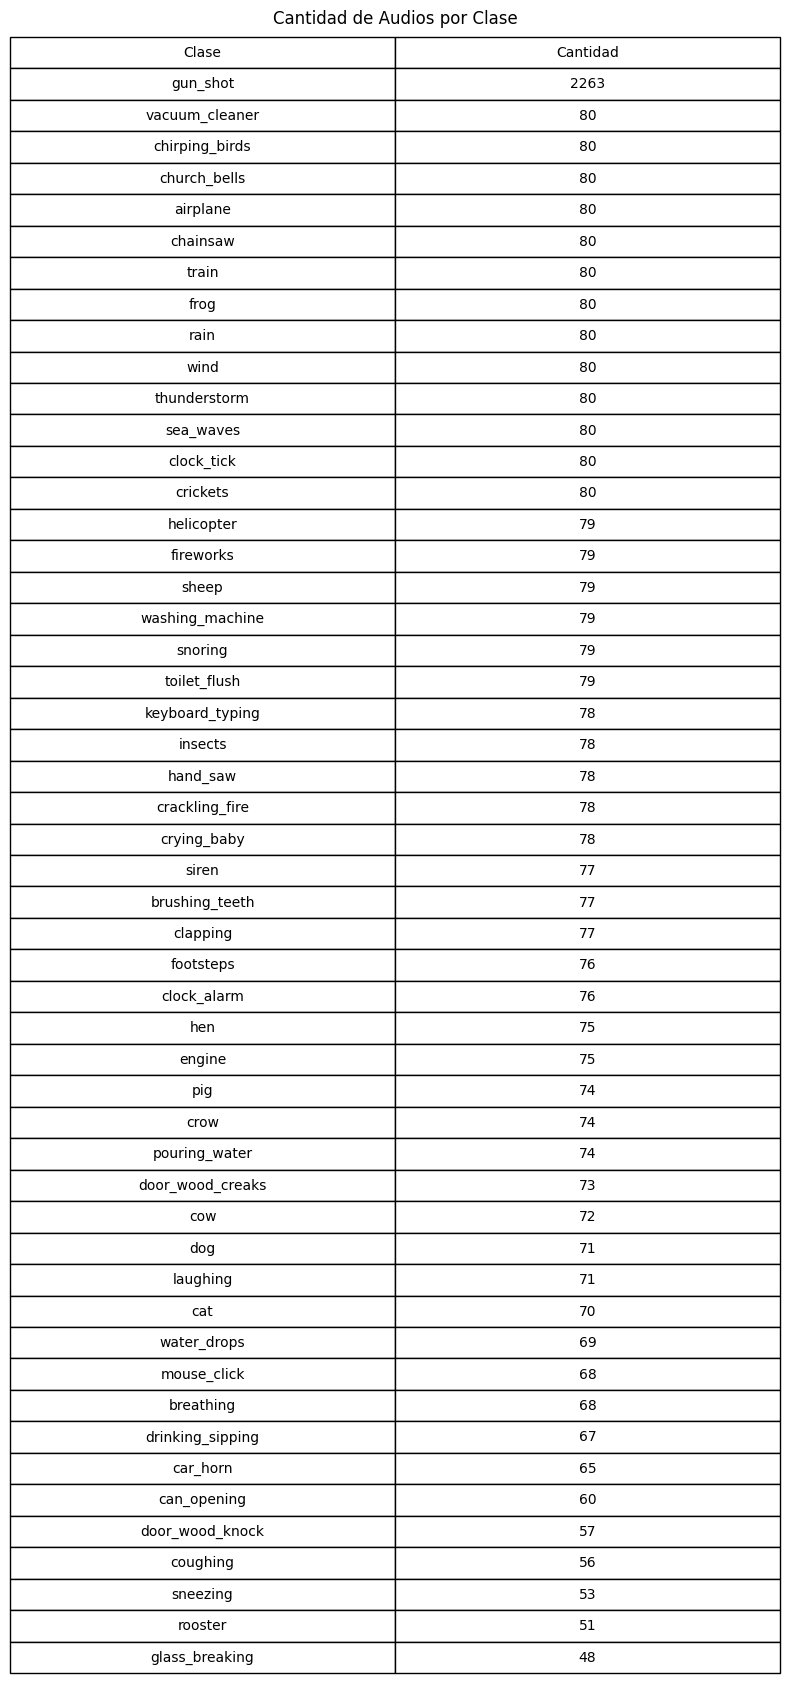

In [14]:
# --- Tabla: Conteo por clase
fig, ax = plt.subplots(figsize=(8, len(conteo_clases) * 0.333))
ax.axis('off')
tabla1 = pd.DataFrame(conteo_clases).reset_index()
tabla1.columns = ["Clase", "Cantidad"]
tabla1_plot = ax.table(cellText=tabla1.values, colLabels=tabla1.columns, loc='center', cellLoc='center')
tabla1_plot.auto_set_font_size(False)
tabla1_plot.set_fontsize(10)
tabla1_plot.scale(1, 1.5)
plt.title("Cantidad de Audios por Clase")
plt.tight_layout()
plt.show()

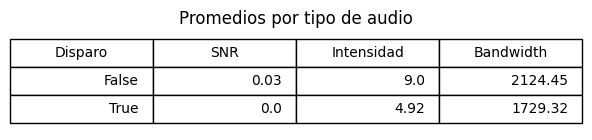

In [20]:
# --- Tabla: Promedios por tipo (Disparo vs No Disparo)
promedios = df.groupby("Disparo")[["SNR", "Intensidad", "bandwiht"]].mean().round(2)
fig, ax = plt.subplots(figsize=(6, 1.5))
ax.axis('off')
tabla2_plot = ax.table(cellText=promedios.reset_index().values, colLabels=["Disparo", "SNR", "Intensidad", "Bandwidth"], loc='center')
tabla2_plot.auto_set_font_size(False)
tabla2_plot.set_fontsize(10)
tabla2_plot.scale(1.2, 2)
plt.title("Promedios por tipo de audio")
plt.tight_layout()
plt.show()